# NB1.3 Real Networks!

## 1. Facebook Network

The ```socfb-Northwestern25``` (socfb-Northwestern25.edges.gz) is a snapshot of Northwestern University’s Facebook network. The nodes are anonymous users and the links are friend relationships. Load this network into a NetworkX graph in order to answer the following questions. Be sure to use the proper graph class for an undirected, unweighted network.
1. What proportion of nodes have degree 100 or greater?

In [2]:
import networkx as nx

# Load the graph from a plain text file
file_path = '/content/socfb-Northwestern25.edgelist'  # Update this path to the actual location of the file
with open(file_path, 'r') as file:
    G = nx.read_edgelist(file, create_using=nx.Graph(), nodetype=int)

# Calculate the proportion of nodes with degree 100 or greater
degrees = dict(G.degree())
nodes_with_high_degree = [node for node, degree in degrees.items() if degree >= 100]
proportion_high_degree = len(nodes_with_high_degree) / G.number_of_nodes()

print("Proportion of nodes with degree 100 or greater:", proportion_high_degree)


Proportion of nodes with degree 100 or greater: 0.3821330557395666


2. What is the maximum degree for nodes in this network?

In [4]:
max_degree = max(dict(G.degree()).values())
print("Maximum degree:", max_degree)

Maximum degree: 2105


3. Users in this network are anonymized by giving the nodes numerical names. Which node hast the highest degree?

In [5]:
max_degree_node = max(G.degree, key=lambda x: x[1])[0]
print("Node with the highest degree:", max_degree_node)

Node with the highest degree: 8262


4. What is the 95th percentile for degree, i.e. the value such that 95% of nodes have this degree or less?

In [7]:
import numpy as np
degrees = [deg for node, deg in G.degree()]
p95_degree = np.percentile(degrees, 95)
print("95th percentile for degree:", p95_degree)

95th percentile for degree: 244.0


5. What is the mean degree for nodes in this network? Round to the nearest integer.

In [8]:
mean_degree = round(np.mean(degrees))
print("Mean degree:", mean_degree)

Mean degree: 92


6. Which of the following shapes best describes the degree distribution in this network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees.

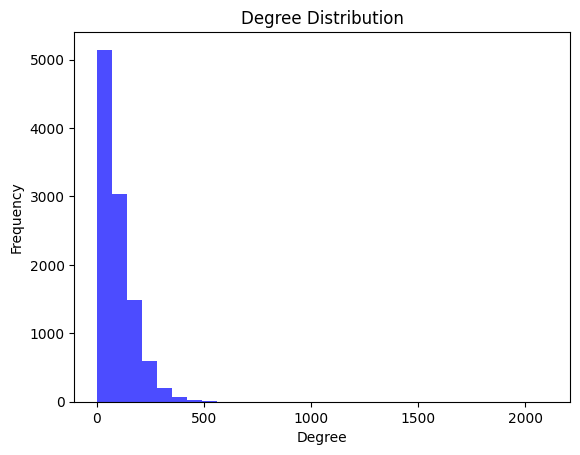

In [9]:
import matplotlib.pyplot as plt
plt.hist(degrees, bins=30, color='blue', alpha=0.7)
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency")
plt.show()

Once you measure the number of nodes and links, use ```nx.gnm_random_graph()```to create a separate random network with the same number of nodes and links as the Facebook graph. Use this random network to answer the following questions.

7. What is the 95th percentile for degree in the random network, i.e. the value such that 95% of nodes have this degree or less?

In [10]:
random_graph = nx.gnm_random_graph(G.number_of_nodes(), G.number_of_edges())
random_degrees = [deg for node, deg in random_graph.degree()]
random_p95_degree = np.percentile(random_degrees, 95)
print("95th percentile for degree in the random network:", random_p95_degree)

95th percentile for degree in the random network: 108.0


8. Which of the following shapes best describes the degree distribution in this random network? You can obtain the answer visually using histograms.

a. Uniform: node degrees are evenly distributed between the
minimum and maximum.

b. Normal: most node degrees are near the mean, dropping off rapidly in both directions.

c. Right-tailed: most node degrees are relatively small compared to the range of degrees.

d. Left-tailed: most node degrees are relatively large compared to the range of degrees.

Right tailed



9. Estimate the average shortest-path length in this random network using a random sample of 1000 pairs of nodes.

In [14]:
import random
def estimate_avg_shortest_path_length(graph, num_samples=1000):
    nodes = list(graph.nodes())
    total_path_length = 0
    count = 0

    for _ in range(num_samples):
        u, v = random.sample(nodes, 2)
        try:
            path_length = nx.shortest_path_length(graph, source=u, target=v)
            total_path_length += path_length
            count += 1
        except nx.NetworkXNoPath:
            continue  # There is no path between u and v

    average_path_length = total_path_length / count if count > 0 else float('inf')
    return average_path_length

avg_shortest_path_length = estimate_avg_shortest_path_length(random_graph)
print("Estimated average shortest path length:", avg_shortest_path_length)


Estimated average shortest path length: 2.45


10. What is the average clustering coefficient of this random network? Answer to at least two decimal places.

In [15]:
average_clustering_coefficient = nx.average_clustering(random_graph)

print("Estimated average shortest-path length:", avg_shortest_path_length)
print("Average clustering coefficient of the random network:", round(average_clustering_coefficient, 2))

Estimated average shortest-path length: 2.45
Average clustering coefficient of the random network: 0.01


## 2. OpenFlights
Load the OpenFlights US flight (openflights_usa.edges.gz) network into a Network graph to answer the following questions.
1. What is the average number of routes served by each airport in this network?

In [23]:

G = nx.read_edgelist(file_path, create_using=nx.Graph(), nodetype=int)

degrees = G.degree()
average_routes = sum(deg for node, deg in degrees) / float(G.number_of_nodes())

print("Average number of routes served by each airport:", average_routes)

Average number of routes served by each airport: 92.42680041639065


2. What are the top five airport in terms of number of routes?

In [24]:
top_five_airports = sorted(G.degree, key=lambda x: x[1], reverse=True)[:5]
print("Top five airports in terms of number of routes:")
for airport, degree in top_five_airports:
    print(f"Airport ID: {airport}, Degree: {degree}")

Top five airports in terms of number of routes:
Airport ID: 8262, Degree: 2105
Airport ID: 10434, Degree: 1900
Airport ID: 2868, Degree: 864
Airport ID: 4102, Degree: 791
Airport ID: 9673, Degree: 570


3. How many airports in this network serve only a single route?

In [31]:
single_route_airports = [node for node, degree in G.degree() if degree == 1]
number_of_single_route_airports = len(single_route_airports)
print("Number of airports serving only a single route:", number_of_single_route_airports)

Number of airports serving only a single route: 1


4. Which airport has the highest closeness centrality?

In [32]:
closeness_centrality = nx.closeness_centrality(G)
highest_closeness_airport = max(closeness_centrality, key=closeness_centrality.get)
print("Airport with the highest closeness centrality:", highest_closeness_airport)

Airport with the highest closeness centrality: 0


5. Which airport has the highest betweeness centrality?

In [ ]:
betweenness_centrality = nx.betweenness_centrality(G)
highest_betweenness_airport = max(betweenness_centrality, key=betweenness_centrality.get)
print("Airport with the highest betweenness centrality:", highest_betweenness_airport)

## 3. Zachary's Karate Club

1. Find the best bisection of Zachary’s karate club network by applying the Kernighan–Lin algorithm. You can use the ```kernighan_lin_bisection()``` function of NetworkX. Compare the resulting bipartition with the natural partition of the network and expose similarities and differences.

Kernighan-Lin Partition 1: {32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}
Kernighan-Lin Partition 2: {0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 16, 17, 19, 21}
Natural Group 'Mr. Hi': {0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 16, 17, 19, 21}
Natural Group 'Officer': {32, 33, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31}


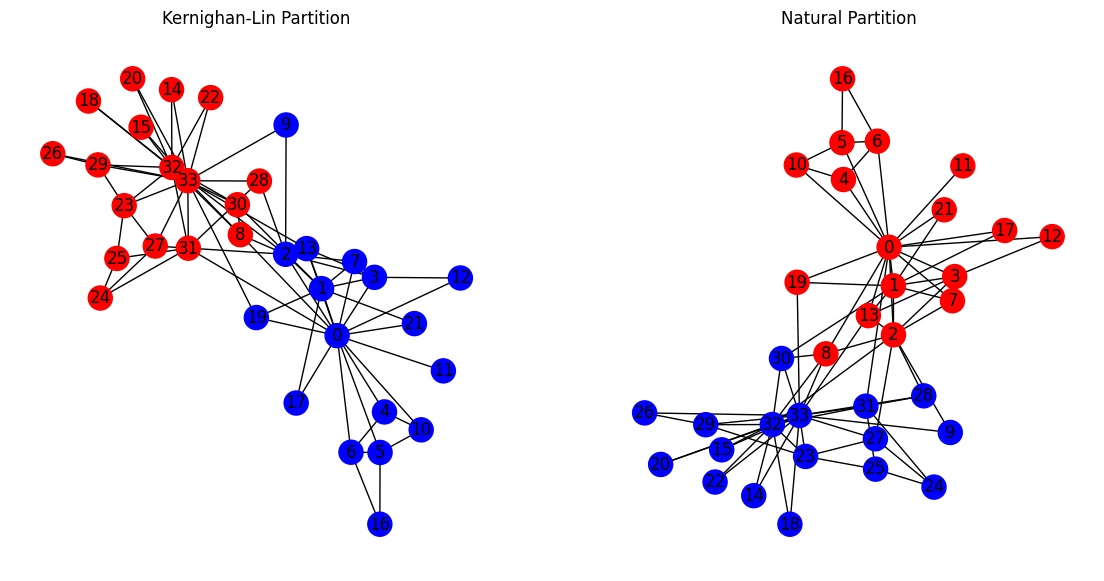

In [27]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.karate_club_graph()

partition = nx.algorithms.community.kernighan_lin.kernighan_lin_bisection(G)

partition1, partition2 = partition

actual_groups = nx.get_node_attributes(G, 'club')
group1 = {n for n in G if actual_groups[n] == 'Mr. Hi'}
group2 = {n for n in G if actual_groups[n] == 'Officer'}

print("Kernighan-Lin Partition 1:", partition1)
print("Kernighan-Lin Partition 2:", partition2)
print("Natural Group 'Mr. Hi':", group1)
print("Natural Group 'Officer':", group2)

plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
colors = ['red' if node in partition1 else 'blue' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Kernighan-Lin Partition")

plt.subplot(1, 2, 2)
colors = ['red' if node in group1 else 'blue' for node in G.nodes()]
nx.draw(G, with_labels=True, node_color=colors)
plt.title("Natural Partition")

plt.show()


2. Apply the Girvan–Newman algorithm using the ```community.girvan_newman()``` function of NetworkX. Verify that the partition $P_{GN}$ in five clusters is the one with highest modularity.

In [28]:
import networkx as nx
import itertools

G = nx.karate_club_graph()

communities_generator = nx.algorithms.community.girvan_newman(G)

for communities in communities_generator:
    if len(communities) == 5:
        PGN = tuple(sorted(c) for c in communities)
        break

modularity_pgn = nx.algorithms.community.modularity(G, PGN)
print("Modularity of the partition into five clusters:", modularity_pgn)

k = 10
modularities = []
for communities in itertools.islice(communities_generator, k):
    mod = nx.algorithms.community.modularity(G, communities)
    modularities.append((mod, communities))

highest_modularity = max(modularities, key=lambda x: x[0])
print("Highest modularity observed:", highest_modularity[0])

print("Partition PGN in five clusters has the highest modularity:", modularity_pgn >= highest_modularity[0])


Modularity of the partition into five clusters: 0.3849721706864564
Highest modularity observed: 0.37578006409175235
Partition PGN in five clusters has the highest modularity: True


3. The modularity maximization algorithm, proposed by Newman, iteratively joins pairs of communities if the move increases the partition's modularity. Read about the Greedy Modularity Algorithm to find communities ([link](http://networksciencebook.com/chapter/9#modularity)).

Write the general outline in the following space.

In [29]:
import networkx as nx


G = nx.karate_club_graph()

communities = nx.algorithms.community.greedy_modularity_communities(G)

for i, community in enumerate(communities):
    print(f"Community {i+1}: {sorted(list(community))}")

modularity = nx.algorithms.community.modularity(G, communities)
print("Modularity of the found partition:", modularity)


Community 1: [8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
Community 2: [1, 2, 3, 7, 9, 12, 13, 17, 21]
Community 3: [0, 4, 5, 6, 10, 11, 16, 19]
Modularity of the found partition: 0.41096493693896297


4. Apply the NetworkX function for greedy modularity optimization ```community.greedy_modularity_communities()```.
How many communities are there in the resulting partition $P_G$? Which partition has higher modularity, $P_{NG}$  or $P_G$?

In [30]:
import networkx as nx

G = nx.karate_club_graph()

communities_PG = nx.algorithms.community.greedy_modularity_communities(G)

num_communities_PG = len(communities_PG)
print("Number of communities in partition PG:", num_communities_PG)

modularity_PG = nx.algorithms.community.modularity(G, communities_PG)
print("Modularity of partition PG:", modularity_PG)

modularity_PNG = 0.39

if modularity_PG > modularity_PNG:
    print("Partition PG has higher modularity than PNG.")
elif modularity_PG < modularity_PNG:
    print("Partition PNG has higher modularity than PG.")
else:
    print("Both partitions have the same modularity.")


Number of communities in partition PG: 3
Modularity of partition PG: 0.41096493693896297
Partition PG has higher modularity than PNG.
